# Group Id-3
# Siva Teja Yadav - rr4899
# Roja Balakrishnan - Pi7973

In [1]:
import sys
!{sys.executable} -m pip install lightgbm

In [2]:
import sys
!{sys.executable} -m pip install xgboost

In [9]:
import numpy as np
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import random
from sklearn import tree
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [10]:
train_data = pd.read_csv("optdigits.tra",header=None)
test_data = pd.read_csv("optdigits.tes",header=None)

In [11]:
type(train_data)

pandas.core.frame.DataFrame

In [12]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Question-1

In [13]:
X25=train_data.groupby(train_data.columns[64]).apply(lambda s: s.sample(25))
X100=train_data.groupby(train_data.columns[64]).apply(lambda s: s.sample(100))

In [14]:
print(X25.shape)
print(X100.shape)

(250, 65)
(1000, 65)


## Question-2

Training Error for depth-2: 0.616
Test Error for depth-2: 0.6572064552031163


Training Error for depth-3: 0.372
Test Error for depth-3: 0.4858096828046744


Training Error for depth-5: 0.07599999999999996
Test Error for depth-5: 0.31942125765164164


Training Error for depth-10: 0.0
Test Error for depth-10: 0.32665553700612127




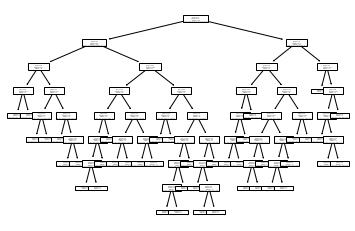

In [15]:
x_train_25 = X25[X25.columns[0:64]]
y_train_25= X25[X25.columns[64]]
x_test_25=test_data[test_data.columns[0:64]]
y_test_25=test_data[test_data.columns[64]]
max_depth = [2,3,5,10]
for i in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(x_train_25,y_train_25)
    tree.plot_tree(clf,max_depth=i)
    y_pred = clf.predict(x_train_25)
    print("Training Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_train_25, y_pred))
    y_pred = clf.predict(x_test_25)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_25, y_pred))
    print("\n")

Training Error for depth-2: 0.633
Test Error for depth-2: 0.6616583194212576


Training Error for depth-3: 0.376
Test Error for depth-3: 0.4351697273233166


Training Error for depth-5: 0.132
Test Error for depth-5: 0.2509738452977184


Training Error for depth-10: 0.0
Test Error for depth-10: 0.19143016138007796




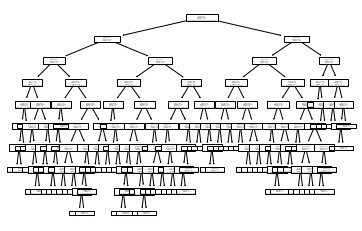

In [16]:
x_train_100 = X100[X100.columns[0:64]]
y_train_100= X100[X100.columns[64]]
x_test_100=test_data[test_data.columns[0:64]]
y_test_100=test_data[test_data.columns[64]]
max_depth = [2,3,5,10]
for i in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(x_train_100,y_train_100)
    tree.plot_tree(clf,max_depth=i)
    y_pred = clf.predict(x_train_100)
    print("Training Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_train_100, y_pred))
    y_pred = clf.predict(x_test_100)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_100, y_pred))
    print("\n")

### X100 test set with max_depth 10 has the best depth value as the number of instances change from 25 to 100, the error rate gets minimal

## Question3

## XGB

In [17]:
max_depth = [2,3,5,7,9]
learning_rate={2:0.01,3:0.05,5:0.30,7:0.50,9:0.1}
#min_child_wt={2:2,3:5,5:9,7:10,9:15}

for i in max_depth:
    clf = XGBClassifier(max_depth=i, learning_rate=learning_rate[i],eval_metric='mlogloss')#, min_child_wt=min_child_wt[i])
    clf = clf.fit(x_train_25,y_train_25)
    y_pred = clf.predict(x_train_25)
    print("Training Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_train_25, y_pred))
    y_pred = clf.predict(x_test_25)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_25, y_pred))
    print("\n")

C:\Users\STSC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Error for depth-2: 0.09599999999999997
Test Error for depth-2: 0.23316638842515303


Training Error for depth-3: 0.0
Test Error for depth-3: 0.14468558708959378


Training Error for depth-5: 0.0
Test Error for depth-5: 0.1263216471897607


Training Error for depth-7: 0.0
Test Error for depth-7: 0.11741791875347807


Training Error for depth-9: 0.0
Test Error for depth-9: 0.12854757929883143




In [18]:
max_depth = [2,3,5,10]
learning_rate={2:0.01,3:0.05,5:0.30,10:0.50}
for i in max_depth:
    clf = XGBClassifier(max_depth=i,learning_rate=learning_rate[i],eval_metric='mlogloss')
    clf = clf.fit(x_train_100,y_train_100)
    y_pred = clf.predict(x_train_100)
    print("Training Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_train_100, y_pred))
    y_pred = clf.predict(x_test_100)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_100, y_pred))
    print("\n")

Training Error for depth-2: 0.09699999999999998
Test Error for depth-2: 0.19866444073455758


Training Error for depth-3: 0.0030000000000000027
Test Error for depth-3: 0.0979410127991096


Training Error for depth-5: 0.0
Test Error for depth-5: 0.08903728436282698


Training Error for depth-10: 0.0
Test Error for depth-10: 0.08681135225375625




## Light GBM

In [19]:
max_depth = [2,3,5,10]
learning_rate={2:0.01,3:0.05,5:0.30,10:0.50}
num_of_leaves={2:3,3:5,5:8,10:8}
for i in max_depth:
    clf = lgb.LGBMClassifier(max_depth=i,learning_rate=learning_rate[i],num_leaves=num_of_leaves[i])
    clf = clf.fit(x_train_25,y_train_25)
    y_pred = clf.predict(x_train_25)
    print("Training Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_train_25, y_pred))
    y_pred = clf.predict(x_test_25)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_25, y_pred))
    print("\n")

Training Error for depth-2: 0.04800000000000004
Test Error for depth-2: 0.18753478018920422


Training Error for depth-3: 0.0
Test Error for depth-3: 0.1263216471897607


Training Error for depth-5: 0.0
Test Error for depth-5: 0.10907067334446297


Training Error for depth-10: 0.0
Test Error for depth-10: 0.10573177518085697




In [20]:
max_depth = [2,3,5,10]
learning_rate={2:0.01,3:0.05,5:0.30,10:0.50}
num_of_leaves={2:3,3:5,5:8,10:8}
for i in max_depth:
    clf = lgb.LGBMClassifier(max_depth=i,learning_rate=learning_rate[i],num_leaves=num_of_leaves[i])
    clf = clf.fit(x_train_100,y_train_100)
    y_pred = clf.predict(x_train_100)
    print("Training Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_train_100, y_pred))
    y_pred = clf.predict(x_test_100)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_100, y_pred))
    print("\n")

Training Error for depth-2: 0.08099999999999996
Test Error for depth-2: 0.17807456872565386


Training Error for depth-3: 0.0
Test Error for depth-3: 0.08124652198107962


Training Error for depth-5: 0.0
Test Error for depth-5: 0.0690038953811909


Training Error for depth-10: 0.0
Test Error for depth-10: 0.0656649972175849




## Question4

In [21]:
Hid_layers = [2,3,5,10]
max_iterations={2:1000,3:1400,5:1800,10:2000}
for i in max_depth:
    clf = MLPClassifier(hidden_layer_sizes=(i,),max_iter=max_iterations[i],activation = 'relu',solver='adam',random_state=1)
    clf = clf.fit(x_train_25,y_train_25)
    y_pred = clf.predict(x_train_25)
    print("Training Error for hidden_layers-"+str(i)+":",1-metrics.accuracy_score(y_train_25, y_pred))
    y_pred = clf.predict(x_test_25)
    print("Test Error for depth-"+str(i)+":",1-metrics.accuracy_score(y_test_25, y_pred))
    print("\n")

Training Error for hidden_layers-2: 0.888
Test Error for depth-2: 0.8781302170283807


Training Error for hidden_layers-3: 0.808
Test Error for depth-3: 0.813578185865331




C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Error for hidden_layers-5: 0.06399999999999995
Test Error for depth-5: 0.2643294379521425


Training Error for hidden_layers-10: 0.0040000000000000036
Test Error for depth-10: 0.1752921535893155




In [22]:
Hid_layers = [2,3,5,10]
max_iterations={2:1000,3:1400,5:1800,10:2000}
for i in max_depth:
    clf = MLPClassifier(hidden_layer_sizes=(i,),max_iter=max_iterations[i],activation = 'relu',solver='adam',random_state=1)
    clf = clf.fit(x_train_100,y_train_100)
    y_pred = clf.predict(x_train_100)
    print("Training Error for hidden_layers-"+str(i)+":",1-metrics.accuracy_score(y_train_100, y_pred))
    y_pred = clf.predict(x_test_100)
    print("Test Error for hidden layers-"+str(i)+":",1-metrics.accuracy_score(y_test_100, y_pred))
    print("\n")

Training Error for hidden_layers-2: 0.899
Test Error for hidden layers-2: 0.902615470228158




C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Error for hidden_layers-3: 0.121
Test Error for hidden layers-3: 0.21202003338898168


Training Error for hidden_layers-5: 0.0040000000000000036
Test Error for hidden layers-5: 0.13689482470784642


Training Error for hidden_layers-10: 0.0
Test Error for hidden layers-10: 0.09181969949916524




## Question 5

In [23]:
X100_class69 = train_data[train_data[64] == 6].sample(100)
X100_class69 = X100_class69.append(train_data[train_data[64] == 9].sample(100))
xtrain = X100_class69[X100_class69.columns[1:48]]
test69 = test_data[test_data[64] == 6]
test69.append(test_data[test_data[64] == 9])
xtest = test69[test69.columns[1:48]]
regressormodel = MLPRegressor(random_state = 0)
print("Error for each of the  16 features: ")
for i in range(48,64):
    ytrain = X100_class69[i]
    ytest = test69[i]
    regressormodel.fit(xtrain, ytrain)
    pred = regressormodel.predict(xtest)
    print(f"The test Error for feature {i}: {math.sqrt(mean_squared_error(ytest,pred))}")
    if math.sqrt(mean_squared_error(ytest,pred))<=2:
        print("it is a easy to predict")
    else:
        print('It is not easy to predict')

Error for each of the  16 features: 


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 48: 0.5859779697561194
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 49: 0.8936949532427456
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 50: 2.277064680521246
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 51: 2.4289573968992686
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 52: 3.3684098329033305
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 53: 3.5749863449760704
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 54: 3.013061819632327
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 55: 1.7005239300155197
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 56: 0.5859779697561194
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 57: 0.6022645740757782
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 58: 1.2227803161859117
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 59: 2.236940117447421
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 60: 1.565086252395906
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 61: 2.921118335465197
It is not easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The test Error for feature 62: 4.141340567302395
It is not easy to predict
The test Error for feature 63: 1.243575149179605
it is a easy to predict


C:\Users\STSC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Pixels 48, 56 and 57 have got less error rate 